In [2]:
import pandas as pd

pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime

In [7]:
import matplotlib.pyplot as plt
symbols = [
    'SPASTT01USM661N', # 미국
    'SPASTT01JPM661N', # 일본
    'SPASTT01EZM661N', # 유럽
    'SPASTT01KRM661N', # 한국
]

data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred',
                               start=datetime.datetime(2001, 1, 1),
                               end=datetime.datetime(2021, 10, 27))[sym]
data.columns = ['US', 'JP', 'EZ', 'KR']
data = data / data.iloc[0] * 100  # scaling


In [8]:
data

,US,JP,EZ,KR
DATE,,,,
2001-01-01,100.000000,100.000000,100.000000,100.000000
2001-02-01,99.612871,97.917639,96.626510,101.079958
2001-03-01,92.757500,96.404115,89.670928,92.910435
2001-04-01,93.275174,102.259781,91.356905,90.028276
2001-05-01,99.077751,107.404208,95.034583,102.156509
...,...,...,...,...
2021-05-01,238.270261,148.372864,113.741514,539.696113
2021-06-01,240.926377,152.009213,116.682427,555.163016
2021-07-01,240.254462,150.136956,116.299821,554.384560


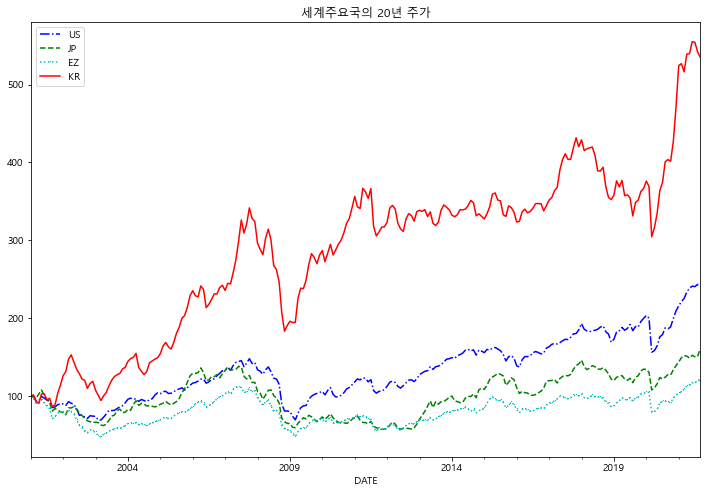

In [16]:
styles = ['b-.', 'g--', 'c:,', 'r-']
data.plot(style=styles, figsize=(12,8))
plt.title('세계주요국의 20년 주가')
plt.show()

In [17]:
df = ((data.pct_change() + 1).resample('A').prod() - 1).T * 100
print(df.iloc[:, :5])

DATE  2001-12-31  2002-12-31  2003-12-31  2004-12-31  2005-12-31
US    -10.388816  -17.680773   23.135271   14.233654    9.135500
JP    -20.762910  -16.923968   19.628102    9.945947   44.912009
EZ    -21.008203  -30.647772   12.066127   10.551998   22.994959
KR     13.504582    4.448180   15.121124    9.091136   53.381919


C:\Users\ghdak\anaconda3\envs\tf_gpu\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ghdak\anaconda3\envs\tf_gpu\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


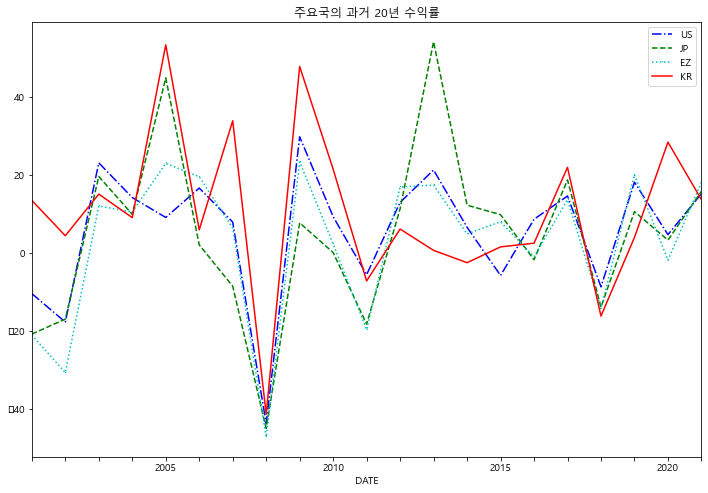

In [19]:
df.T.plot(style=styles, figsize=(12,8))
plt.title('주요국의 과거 20년 수익률')
plt.xticks(df.columns)
plt.show()

C:\Users\ghdak\anaconda3\envs\tf_gpu\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ghdak\anaconda3\envs\tf_gpu\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


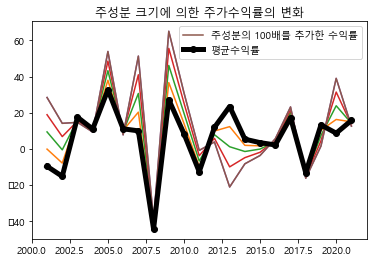

In [20]:
from sklearn.decomposition import PCA
import numpy as np

pca2 = PCA(n_components=1)
w = pca2.fit_transform(df)

m = pca2.mean_
p1 = pca2.components_[0]

xrange = np.linspace(2001, 2021, 21, dtype=int)
for i in np.linspace(0, 100, 5):
    plt.plot(xrange, pca2.mean_ + p1 * i)
plt.plot(xrange, pca2.mean_ + p1 * 100, label = '주성분의 100배를 추가한 수익률')
plt.plot(xrange, pca2.mean_, 'ko-', lw=5, label='평균수익률')
plt.title('주성분 크기에 의한 주가수익률의 변화')
plt.legend()
plt.show()